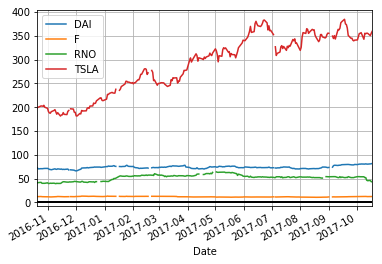

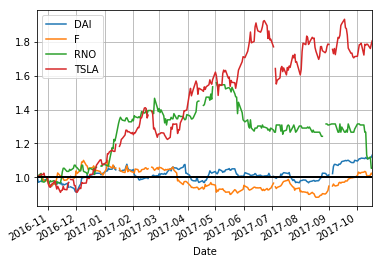

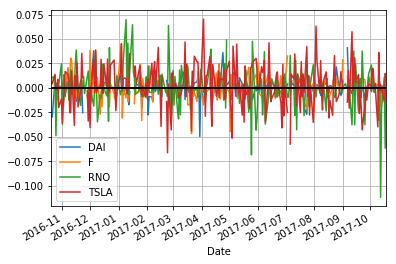

In [108]:
## adapted from https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
## more on data access http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#google-finance

import numpy as np

import pandas as pd

import pandas_datareader.data as web

import datetime

import matplotlib.pyplot as plt

## time period for observations
start = datetime.datetime(2014,1,1)
end = datetime.date.today()

## list of stocks in portfolio
stocks = ['F','RNO','DAI','TSLA']

#stocks = ['GOOG','MSFT','FB','INTC','IBM','HPQ']

## download data for each of the stocks in portfolio
data = web.DataReader(stocks,'google',start, end)['Close']

## print first few lines of data
data.head()

## plot data in line graph
data.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

## apply invokes a function on the values of a series, in this case the closing price data downloaded above
## the function tells python to output a return
## we are applying the function by passing an anonymous function as an argument in apply
stock_return = data.apply(lambda x: x / x[0])
stock_return.head()

stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

## show plots
plt.show()

In [109]:
returns = stock_change.dropna()   # this cleans the data by omitting rows in the dataframe that have missing data

## for loop for plotting the frequency distribution of returns for each stock in list
## arange() returns evenly spaced values within a given interval
## note that we use arange() because we have values of the float type
## for integer type us range()

## use the describe() function for descriptive statistics.  This gives the mean, standard deviation, min and max values
## also given are the 25%, 50%, and 75% percentiles which indicate the skewness of a distribution
## the 50% percentile is the median (mean for a normal distribution)
## for a normal distribution, the 25% percentile should be the negative of the 75% percentile

for column in returns:
    #max = returns[column].max()
    #min = returns[column].min()
    #binwidth = (max-min)*0.01
    #plt.hist(returns[column], bins=np.arange(min, max + binwidth, binwidth))
    #plt.show()
    print returns[column].describe()

count    237.000000
mean       0.000554
std        0.010669
min       -0.049727
25%       -0.004880
50%        0.001122
75%        0.006143
max        0.040914
Name: DAI, dtype: float64
count    237.000000
mean       0.000350
std        0.012254
min       -0.046675
25%       -0.006541
50%        0.000797
75%        0.006785
max        0.045039
Name: F, dtype: float64
count    237.000000
mean      -0.000365
std        0.020261
min       -0.111791
25%       -0.008811
50%        0.000000
75%        0.009569
max        0.069733
Name: RNO, dtype: float64
count    237.000000
mean       0.002637
std        0.021566
min       -0.066200
25%       -0.008012
50%        0.001605
75%        0.016615
max        0.070137
Name: TSLA, dtype: float64


In [110]:
## Function to get a vector of random portfolio weights that sums to 1:

np.random.seed(123)

def random_weights(n):
    a = np.random.rand(n)
    return a/sum(a)


returns = stock_change.dropna()     # this cleans the data by omitting rows in the dataframe that have missing data

returns = returns.values            # this cleans the data by listing only the values of the dataframe without the index
                                    # in this case the date time stamp   
returns = returns.T                 # transpose the data matrix so to ease matrix multiplication later on
print returns

cov = np.asmatrix(np.cov(returns))  # check to see that covariance matrix has correct dimensions
print cov

weights = np.asmatrix(random_weights(returns.shape[1]))  # check to see that vector of portfolio weights has correct dimensions
print weights

[[ -2.95809050e-02   7.93654960e-03  -2.82725662e-03   4.51978171e-03
    2.67398653e-03   1.96574059e-03   1.12154785e-03  -1.14142013e-02
   -1.87402666e-02  -2.74745311e-03  -8.72605886e-03   1.93843767e-02
    9.55307757e-03  -1.28536474e-02  -3.16729317e-03   1.50271164e-02
   -1.12850280e-02   6.44378259e-03  -1.37972870e-02   5.77202180e-03
   -4.75950996e-03   8.06339862e-03   2.57805929e-03  -2.53508180e-02
   -7.93421735e-03  -4.87986181e-03  -1.58377732e-02  -4.37703514e-03
    5.58112920e-03   3.79297293e-02   5.63219050e-03   3.63419279e-02
    2.63504764e-03   1.93718063e-03   1.65745894e-03   1.04339222e-02
   -1.19531546e-02   6.88707956e-03   4.10959482e-03   6.67622890e-03
    8.14442830e-04   7.97355397e-03  -3.50593671e-03   1.61965213e-03
    4.07387853e-03   4.86684751e-03   1.35291060e-02   2.66063591e-04
    1.55737607e-02  -6.96500614e-03   9.22691689e-04   7.87405643e-03
    9.10871620e-03  -1.72463120e-02  -3.82914576e-03  -1.72677203e-03
   -1.99614146e-03  

(matrix([[ 0.00086391]]), matrix([[ 0.01155451]]))


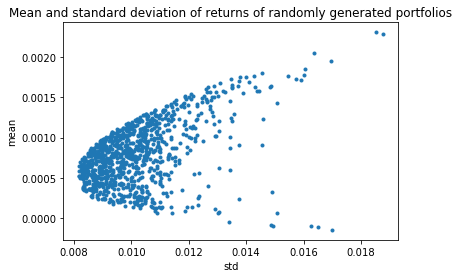

In [111]:
def initial_portfolio(returns):
    
    cov = np.asmatrix(np.cov(returns))
    expected_returns = np.asmatrix(np.mean(returns, axis=1))
    weights = np.asmatrix(random_weights(returns.shape[0])) 
    
    mu = weights * expected_returns.T
    sigma = np.sqrt(weights * cov * weights.T)
    
    return mu, sigma

n_portfolios = 1000
means, stds = np.column_stack([
    initial_portfolio(returns) 
    for _ in range(n_portfolios)
])

plt.plot(stds, means, 'o', markersize=3)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')

print(initial_portfolio(returns))

plt.show()

In [112]:
import cvxopt as opt                # please see documentation at http://cvxopt.org/
from cvxopt import blas, solvers    # blas = Basic Linear Algebra Subprograms, solvers is used for convex optimization

def optimal_portfolio(returns):
    n = len(returns)                # use function len() to return the length of object 'returns'
    returns = np.asmatrix(returns)  # use function asmatrix() to interpret input object 'returns' as matrix
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
                                 # eye() returns a 2-D array with ones on the diagonal and zeros elsewhere
    h = opt.matrix(0.0, (n ,1))  # n x 1 matrix of 0s
    A = opt.matrix(1.0, (1, n))  # 1 x n matrix of 1s
    b = opt.matrix(1.0)          # scalar = 1
    
    # Calculate efficient frontier weights using quadratic programming (qp)
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]    # dot() function returns the dot product of two matrices
                                                         # note that dot() works equally well for matricies with complex elements
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(returns)

plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')

print (weights)

## note that output will show the progress in finding the optimal solution to the Lagrangian dual problem.
## please refer to the following 
## https://en.wikipedia.org/wiki/Duality_(optimization)
## https://en.wikipedia.org/wiki/Duality_gap
## https://github.com/cvxopt/cvxopt/blob/master/src/python/cvxprog.py
## https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
##
## pcost and dcost in the output refer to the optimal primal and dual solutions
## gap refers to the duality gap

     pcost       dcost       gap    pres   dres
 0: -7.9456e-04 -1.0026e+00  1e+00  0e+00  3e+00
 1: -7.9703e-04 -1.2628e-02  1e-02  8e-17  3e-02
 2: -1.0016e-03 -2.7251e-03  2e-03  2e-16  4e-03
 3: -2.5620e-03 -3.1671e-03  6e-04  2e-16  5e-04
 4: -2.6116e-03 -2.6192e-03  8e-06  2e-16  6e-06
 5: -2.6137e-03 -2.6137e-03  8e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9405e-04 -1.0026e+00  1e+00  1e-16  3e+00
 1: -7.9651e-04 -1.2627e-02  1e-02  9e-17  3e-02
 2: -1.0009e-03 -2.7236e-03  2e-03  1e-16  4e-03
 3: -2.5595e-03 -3.1635e-03  6e-04  9e-16  5e-04
 4: -2.6087e-03 -2.6164e-03  8e-06  1e-16  6e-06
 5: -2.6108e-03 -2.6109e-03  8e-08  1e-16  6e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.9347e-04 -1.0026e+00  1e+00  4e-16  3e+00
 1: -7.9593e-04 -1.2626e-02  1e-02  1e-16  3e-02
 2: -1.0002e-03 -2.7220e-03  2e-03  4e-17  4e-03
 3: -2.5566e-03 -3.1595e-03  6e-04  6e-16  5e-04
 4: -2.6055e-03 -2.6132e

 5:  6.4996e-02  6.4996e-02  8e-09  1e-16  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.1161e-02 -9.6915e-01  1e+00  4e-16  3e+00
 1:  7.8175e-02  2.9948e-02  5e-02  1e-16  1e-01
 2:  7.3103e-02  6.9328e-02  4e-03  6e-17  2e-17
 3:  7.2996e-02  7.2926e-02  7e-05  1e-16  4e-17
 4:  7.2996e-02  7.2995e-02  7e-07  1e-16  4e-17
 5:  7.2996e-02  7.2996e-02  7e-09  8e-17  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.0395e-02 -9.6322e-01  1e+00  2e-16  3e+00
 1:  8.7088e-02  3.7303e-02  5e-02  1e-16  1e-01
 2:  8.2066e-02  7.8421e-02  4e-03  1e-16  6e-17
 3:  8.1972e-02  8.1909e-02  6e-05  2e-16  4e-17
 4:  8.1972e-02  8.1971e-02  6e-07  1e-16  7e-17
 5:  8.1972e-02  8.1972e-02  6e-09  2e-16  3e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.0068e-01 -9.5629e-01  1e+00  2e-16  3e+00
 1:  9.7051e-02  4.5835e-02  5e-02  2e-16  1e-01
 2:  9.2125e-02  8.8644e-02  3e-03  1e-16  1e-16


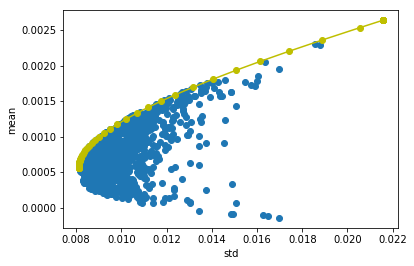

In [113]:
plt.show()